In [1]:
# this is using the hsnt kernel conda environment

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from __code.svmbir_reconstruction_in_white_beam_mode import SvmbirReconstruction


from __code import system

system.System.select_working_dir(facility='HFIR', instrument='CG1D', ipts='IPTS-32720')
from __code.__all import custom_style
custom_style.style()

# Input sample folder

This folder will contains all the images (1 image per angle)

<font color='blue'><b>Instructions</b>: select folder containing projections</font>

In [2]:
o_white_beam = SvmbirReconstruction(system=system)
o_white_beam.select_top_sample_folder()

Top sample folder selected: /HFIR/CG1D/IPTS-32720/raw/ct_scans/2024_10_30_anodefree/


# Input Open Beam (OB) folder

Select the images to use as OB

<font color='blue'><b>Instructions</b>: select individual images</font>

In [3]:
o_white_beam.select_ob_images()

top ob folder is: /HFIR/CG1D/IPTS-32720/raw/ob/2024_10_30_anodefree


# Input Dark Current (DC) folder

Select the images to use as DC

<font color='blue'><b>Instructions</b>: select individual images</font>

In [4]:
o_white_beam.select_dc_images()

# Load data

This cell will load the data.

- <font color=blue><b>White beam</b></font>:
This step will add all the counts within a given run, making it feel like the data were acquired in white beam mode, loosing the time-of-flight (TOF) information.

This step will also sort the runs by increasing angle value.

In [5]:
o_white_beam.load_data()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='red' size='5'>OPTIONAL</font>: visualize data loaded  <b>(this may take a long time to process !)</b>

In [ ]:
o_white_beam.visualize_raw_data()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='red' size='5'>OPTIONAL</font>: Remove outliers

# Pre-processing - remove outliers

Two algorithms are provided:

* using histogram (remove dead pixels, abnormal very high counts)
* using thresholding (remove high intensity bright spots)

<font color='blue'><b>Instructions</b>: select the algorithms you want to use.

In [ ]:
o_white_beam.clean_images_settings()

The next cell will be ignored if you didn't select <b>histogram</b>. 

<font color='blue'><b>Instructions</b>: if using the <b>histogram</b> algorithm, by default, all the pixels found in the first and last bin are considered as **bad** pixels. You have the option to change those settings. </font>

In [ ]:
o_white_beam.clean_images_setup()

In [ ]:
o_white_beam.clean_images()

<hr style="border-bottom: dotted 1px;" /><hr>

# Normalization


<font color='blue'><b>Instructions</b>: in order to improve the normalization, you can turn ON/OFF any of the following 

- <font color=red><b>use proton charge</b></font>: that option will use the proton charge value requested for each runs and open beams and will bring them to the same value by applying a coefficient corector to the data.
- <font color=red><b>use background region of interest (ROI)</b></font>: select a region that does not contain any part of the sample in order to match the counts with the same ROI of the open beam.</font>

In [6]:
o_white_beam.normalization_settings()

This next cell will allow you to select the background region within the projections images, or will just be ignored if you not chose to use it.

<font color='blue'><b>Instructions</b>: define ROI

Make sure you select a region <font color='red'> OUTSIDE</font> of your sample

<img src="__code/__all/demo_of_roi_selection.gif" />

NB: The next cell will be ignored if you didn't select <b>Use ROI</b>

In [7]:
o_white_beam.normalization_select_roi()

interactive(children=(IntSlider(value=750, description='left', max=6199), IntSlider(value=5372, description='r…

This cell will perform the normalization using any of the settings you define just above.

In [8]:
o_white_beam.normalization()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='red' size='5'>OPTIONAL</font>: run it only if you want to visualize the normalized data

In [ ]:
o_white_beam.visualization_normalization_settings()

In [ ]:
o_white_beam.visualize_normalization()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='red' size='5'>OPTIONAL</font>: run if you want to rotate the data

<font color='blue'>The reconstruction algorithm will ONLY work if the rotation axis is VERTICAL</font>!

select the angle to use

In [9]:
o_white_beam.rotate_data_settings()

Run to perform the transformation by the angle specified

In [10]:
o_white_beam.apply_rotation()

100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


Vizualize the images after rotation

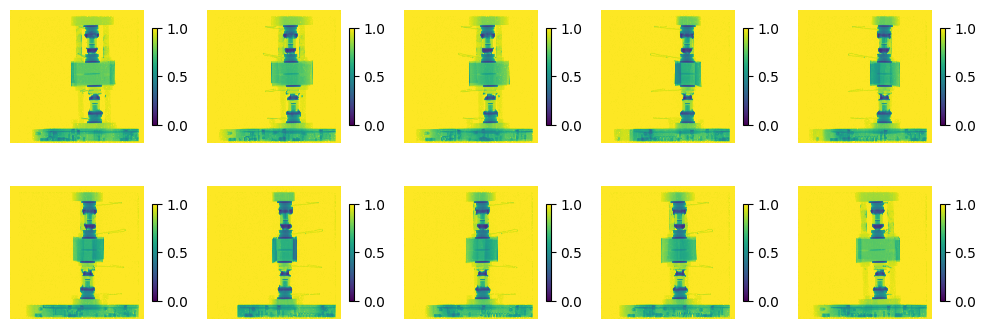

In [11]:
o_white_beam.visualize_after_rotation()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='red' size='5'>OPTIONAL</font>: run if you want to export the normalized data

Select the folder where to export the normalized images

In [ ]:
o_white_beam.select_export_normalized_folder()

Run this cell to execute the export of the normalized images

In [ ]:
o_white_beam.export_normalized_images()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='red' size='5'>OPTIONAL</font>: run if you want to remove any stripes causing ring artifacs in the reconstruction

## Remove stripes

<font size=1><u>Developer Notes</u>: this step will create the 3d array <i>strip_corrected_images</i>

In [ ]:
o_white_beam.select_remove_strips_algorithms()

In [ ]:
o_white_beam.define_settings()

In [ ]:
o_white_beam.remove_strips_and_display()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='red' size='5'>OPTIONAL</font>: run if you want to correct for tilt and center of rotation

# Calculate center of rotation and tilt

The algorithm will determine the 0 and 180 degrees runs and use those to calculate the <b>center of rotation</b> and the <b>tilt</b>
<br><br>

<font color='blue'><b>Instructions</b>: first, you need to select an vertical range contaning the sample

<font color='blue'>TIPS</font> - Make sure the sample is within the range defined

<font size=1 color='black'><u>Developer Notes</u>: this step will create the 3d array <i>corrected_images</i>

In [12]:
o_white_beam.select_sample_roi()

interactive(children=(IntSlider(value=0, description='y_top', max=6199), IntSlider(value=6199, description='y_…

Select the mode you want to use to calculate the **center of rotation** and the **tilt**

* automatic mode will use the [neutompy](https://neutompy-toolbox.readthedocs.io/en/latest/index.html) library
* manual mode will let you figure out the tilt and the center of rotation

In [13]:
o_white_beam.center_of_rotation_and_tilt_settings()

RadioButtons(index=1, options=('Automatic', 'Manual'), value='Manual')

<font color='blue'><b><u>Instructions</u></b>: 

<b>Manual</b> mode:  

* select the images you want to display at the same time using **CMD + click**
* **position the blue** vertical dashed line at the center of rotation
* **rotate** the sample in order to determine the tilt correction to apply

<b>Automatic</b> mode:  

* **tilt** and **center of rotation** will be automaticaly calculated and apply

In [16]:
o_white_beam.perform_center_of_rotation_and_tilt()

interactive(children=(SelectMultiple(description='angles', index=(0, 1), options=('0 degree', '180 degree', '3…

<hr><hr style="border-bottom: dotted 1px;" />
<font color='red' size='5'>OPTIONAL</font>: run if you want to crop the data

In [17]:
o_white_beam.crop_settings()

interactive(children=(IntSlider(value=2549, description='left', layout=Layout(width='100%'), max=6199), IntSli…

execute the cropping

In [18]:
o_white_beam.crop()

<hr style="border-bottom: dotted 1px;" /><hr>

# Reconstruction

The following cells will perform the reconstruction using the svmbir algorithm

<font color='blue'><b>Instructions</b>: 

- select the vertical range of slices you want to use in the reconstruction (the larger the range, the longer it will take to reconstruct the volume). Any slice outside of that range won't be render.
- define the reconstruction settings (keeping the <b>default values</b> is a good choice for novice users)</font>

The rendered slices will be automatically displayed when it's done!

In [19]:
o_white_beam.svmbir_settings()

HTML(value='<font size=5>Select range of slices to reconstruct</font')

interactive(children=(IntSlider(value=0, description='image_index', max=9), IntSlider(value=0, description='to…

HTML(value='<hr>')

HTML(value='<font size=5>Define reconstruction settings</font')

<hr><hr style="border-bottom: dotted 1px;" />
<font color='red' size='5'>OPTIONAL</font>: run if you want to display the sinograms

In [ ]:
o_white_beam.svmbir_display_sinograms()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='red' size='5'>OPTIONAL</font>: export intermediate files

* <b>config file</b> can be used to load the command line version of this program
* <b>log file</b> to check the full process up to here
* <b>stack of projectons ready to be reconstructed</b>

In [20]:
o_white_beam.select_export_extra_files()

Top extra folder selected: /HFIR/CG1D/IPTS-32519/shared/processed_data/jean_test


In [21]:
o_white_beam.export_extra_files()

Files exported:
	log file from /SNS/VENUS/shared/log/svmbir_reconstruction_white_beam_mode.log to /HFIR/CG1D/IPTS-32519/shared/processed_data/jean_test!
		config file /SNS/VENUS/shared/log/_11m_13d_2024y_16h_27mn.json


<hr style="border-bottom: dotted 1px;" /><hr>

# Run the reconstruction

In [ ]:
# o_white_beam.svmbir_run()

# Export the slices

<font color='blue'><b>Instructions</b>: select the folder where to export the reconstructed slices

In [ ]:
o_white_beam.select_export_slices_folder()

This next cell will export the slices. 

In [ ]:
o_white_beam.export_slices()